In [2]:
# extract information from dump file.
import numpy as num
import matplotlib.pyplot as plt
import pylab as lab
from scipy import constants
import scipy as sci
import pandas as pan
import os
from collections import OrderedDict
from scipy.optimize import curve_fit




%matplotlib inline

In [3]:
def DumpExtractor(filename,frames,atomNumber):


    """
infoDict=DumpExtractor(filename,frames,atomNumber,atomPlate)


Function that extracts the information from the .dump file created by openmd


    Inputs:
  ===========


   filename:

               Path of the dump file from which the information is to be extracted

    frame:

                Total number of frames in the dump file

    atomNumber:

                Totla number of atoms in the slab or crystal


    Outputs:
 =============

 infoDict:

         Dictonary containing position, velocity, chargeQV, electricField, plateEQV.
         Postion is a list of [x,y,z] and each x,y,z are array of x[frames][sites]
         velocity is a list of [vx,vy,vz] and each vx,vy,vz are array of vx[frames][sites]
         chargeQV is a lisf of [c,cv] and each c and cv are array of c[frame][sites]
         electric field is list of [ex,ey,ez] and each are array of ex[frame][sites]
         plateEQV is the list of [pex,pey,pez,pc,pcv] and each are array of pex[frames][sites]
"""
    fileDump=open(filename)  #dump file for info extraction
    linesDump=fileDump.readlines()

    if(linesDump[-1]!="</OpenMD>\n"):
        print("Error: Incomplete file")
        sys.exit();
    processP="Wait"
    processC="Wait"


    #information storage matrix
    #posiiton and velocity storage

    x=num.zeros((frames,atomNumber))
    y=num.zeros((frames,atomNumber))
    z=num.zeros((frames,atomNumber))
    vx=num.zeros((frames,atomNumber))
    vy=num.zeros((frames,atomNumber))
    vz=num.zeros((frames,atomNumber))
    q=num.zeros(4)
    j=num.zeros(3)

    #charge and velocity storage matrix
    c=num.zeros((frames,atomNumber))
    cv=num.zeros((frames,atomNumber))
    ex=num.zeros((frames,atomNumber))
    ey=num.zeros((frames,atomNumber))
    ez=num.zeros((frames,atomNumber))
    efieldConverter=1.0/23.0609 # converts kcal mol^-1 to V/A
    #frame count initilization
    fCount=0
    index=0  #index for the atoms
    for line in linesDump:
        linesSplit=str.split(line)
        length=len(linesSplit)

        if(length!=0 and linesSplit[0]=="<StuntDoubles>" and processP=="Wait"):
            processP="Start"
            continue;

        elif(length!=0 and linesSplit[0]=="</StuntDoubles>" and processP=="Start"):
            processP="Wait"

            fCount=fCount+1

            index=0
            continue;

        elif(fCount>=frames):
            break;

        else:
            processP=processP;
            processC=processC;



        if (processP=="Start"):
            x[fCount][int(linesSplit[0])]=float(linesSplit[2])
            y[fCount][int(linesSplit[0])]=float(linesSplit[3])
            z[fCount][int(linesSplit[0])]=float(linesSplit[4])
            vx[fCount][int(linesSplit[0])]=float(linesSplit[5])
            vy[fCount][int(linesSplit[0])]=float(linesSplit[6])
            vz[fCount][int(linesSplit[0])]=float(linesSplit[7])



    position=[x,y,z]
    velocity=[vx,vy,vz]
    


    infoDict={"position":position,"velocity":velocity}
    return infoDict

In [7]:
path = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/"

## for MNWN

In [8]:
system = "MNWN_Dynamics.dump"

info = DumpExtractor(path+system,1000,4925)

In [9]:
x,y,z=info["position"]

In [10]:


import matplotlib.pyplot as plt

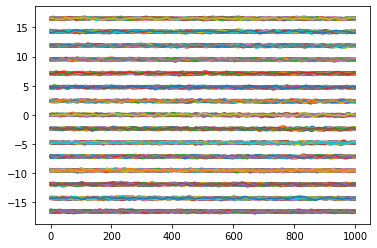

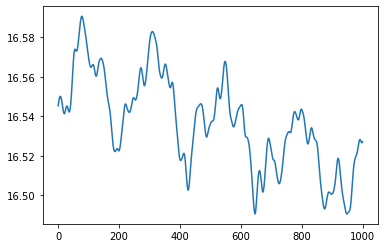

In [11]:
z_av_metal = []
for frame in range(0,1000):
    z_surf = z[frame,:1799][z[frame,:1799]>15.5]
    z_av_metal.append(num.mean(z_surf))
    
plt.plot(z[:,:1799])
#plt.ylim([-20,-15.5])
plt.show()
plt.plot(z_av_metal)

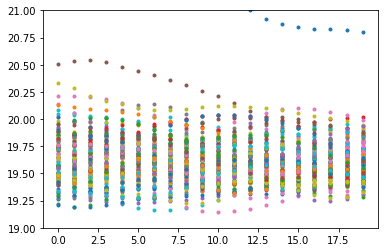

In [12]:
plt.plot(z[:20,1800:],'.')
plt.ylim([19,21])
plt.show()

(19, 21)

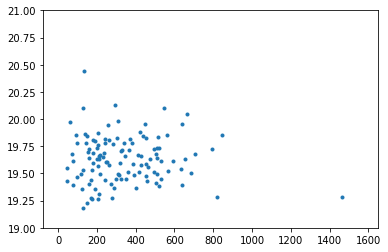

In [13]:
plt.plot(z[5,1800:][z[5,1800:]>0],'.')
plt.ylim([19,21])

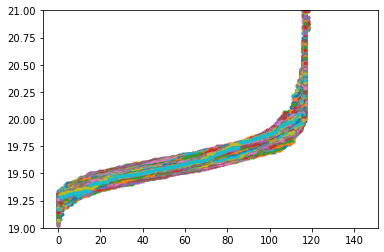

In [14]:

for frame in range(1000):
    plt.plot(num.sort(z[frame,1800:][num.logical_and(z[frame,1800:]>19, z[frame,1800:]<22)]),'.')
    
    plt.ylim([19,21])
    
plt.show()
z_av_water = []
for frame in range(0,1000):
    z_surf = z[frame,1800:][num.logical_and(z[frame,1800:]>19, z[frame,1800:]<21)]
    z_av_water.append(num.mean(z_surf))
    


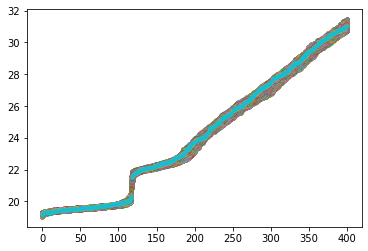

19.57238540966477 22.226207487235722


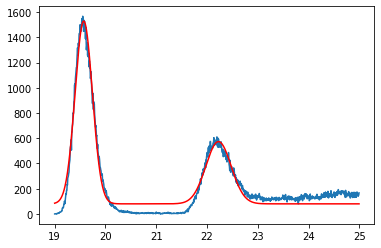

In [29]:
bins = num.linspace(19,25,1000)


surf_atoms_hist = num.zeros(bins.size-1)
for frame in range(1000):
    plt.plot(num.sort(z[frame,1800:][z[frame,1800:]>0])[:400],'.')
    surf_atoms = num.sort(z[frame,1800:][z[frame,1800:]>0])[:400]
    hist , bins = num.histogram(surf_atoms, bins,)
    surf_atoms_hist = hist + surf_atoms_hist
    
plt.show()


z_av_water = []
for frame in range(0,1000):
    z_surf = z[frame,1800:][num.logical_and(z[frame,1800:]>19, z[frame,1800:]<21)]
    z_av_water.append(num.mean(z_surf))

    
    
    
from scipy.optimize import curve_fit
    
def doubleGauss(x,x1,x2,a1,a2,A1,A2,A):
    return A + A1 * num.exp(-a1*(x-x1)**2) + A2 * num.exp(-a2*(x-x2)**2)

const, var = curve_fit(doubleGauss, bins[:-1],surf_atoms_hist,[19.5,22.5,1,1,1600,600,0])
x1,x2,a1,a2,A1,A2,A = const
print(x1,x2)
plt.plot(bins[:-1],surf_atoms_hist)
plt.plot(bins[:-1,],doubleGauss(bins[:-1],x1,x2,a1,a2,A1,A2,A),'r')
plt.show()

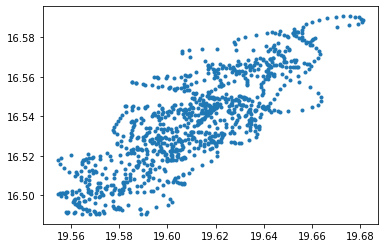

In [16]:
plt.plot(z_av_water,z_av_metal,".")

3.073356690945926


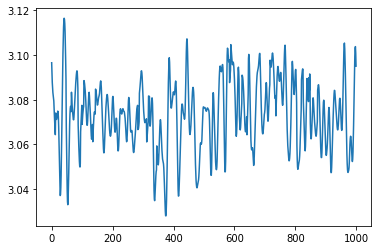

In [17]:
d = num.array(z_av_water) - num.array(z_av_metal)
print(num.mean(d))
plt.plot(d)


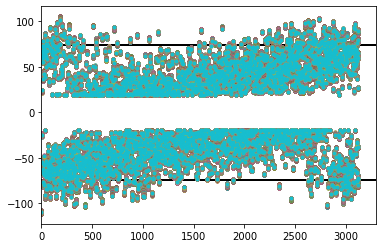

In [18]:
for frame in range(0,1000):
    plt.plot(z[frame,1800:],'.')
    plt.hlines(y=-74,xmin=0,xmax=3300)
    plt.hlines(y=74,xmin=0,xmax=3300)
    plt.xlim([0,3300])

## for MFWN

In [31]:
num.mean(z_av_metal)

16.53709418852731

In [42]:
path = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/checkSystems/"
system = "test1.eor"

info1 = DumpExtractor(path+system,1,4925)

In [43]:
pos1= info1["position"]
vel1 = info1["velocity"]

In [44]:

system = "test2.eor"

info2 = DumpExtractor(path+system,1,4925)

In [45]:
pos2= info2["position"]
vel2 = info2["velocity"]

In [46]:
sum(sum(pos1[0] != pos2[0]))

0

In [47]:
sum(sum(pos1[1] != pos2[1]))

0

In [48]:
sum(sum(pos1[2] != pos2[2]))

0

In [49]:
info1.keys()

dict_keys(['position', 'velocity'])

In [39]:
sum(sum(vel1[2] != vel2[2]))

0

In [50]:
vel1[2]-vel2[2]

array([[0., 0., 0., ..., 0., 0., 0.]])

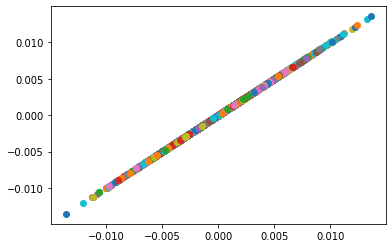

In [58]:
plt.plot(vel1[0],vel2[0],'o')
plt.show()

In [55]:
vel1[0]

array([[-2.557139e-03, -9.632612e-05,  2.008989e-04, ..., -4.726959e-03,
        -8.921414e-03,  3.871187e-03]])